## Derived Insights from the dataset

### Vehicle Type Distribution
This plot shows the popularity among each vehicle type and detailed information on each vehicle type and average ratings for each vehicle type


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('data_cleaned.csv')

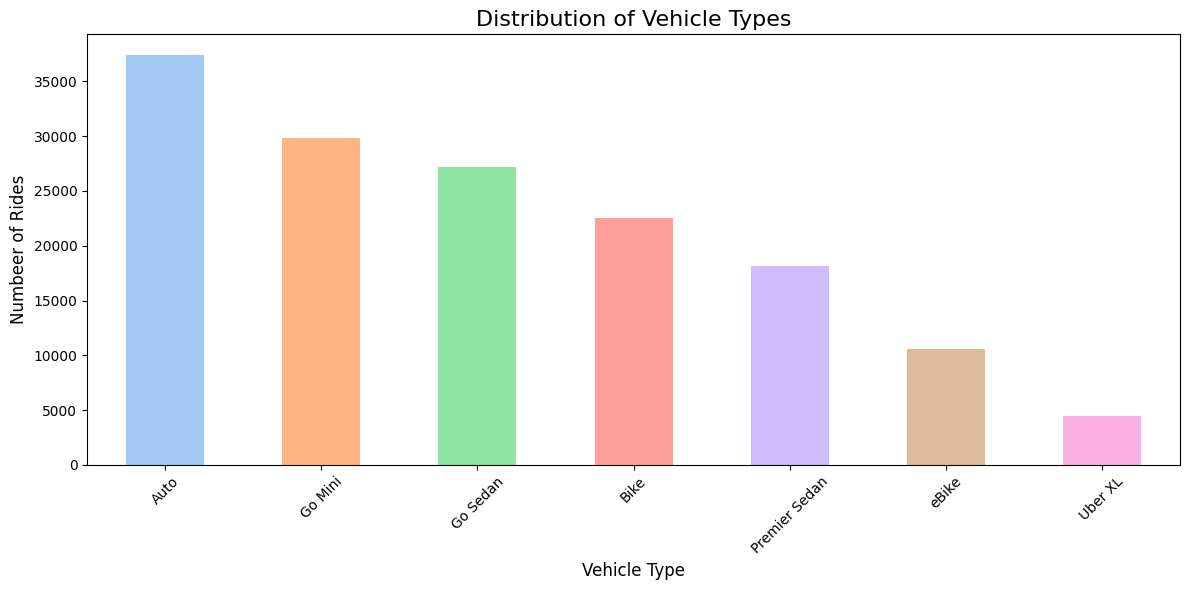

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(12,6))
df1['Vehicle Type'].value_counts().plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Distribution of Vehicle Types', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Numbeer of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('visualization/vehicle_type_dist.png')

In [44]:
vehicle_avg_table = df1.groupby('Vehicle Type').agg({
    'Ride Distance': 'mean',
    'Customer Rating': 'mean',
    'Driver Ratings': 'mean',
    'Booking Value': 'mean'
}).rename(columns={
    'Ride Distance': 'Average Ride Distance(km)',
    'Customer Rating': 'Average Customer Rating',
    'Driver Ratings': 'Average Driver Rating',
    'Booking Value': 'Average Booking Value(rs)'
})

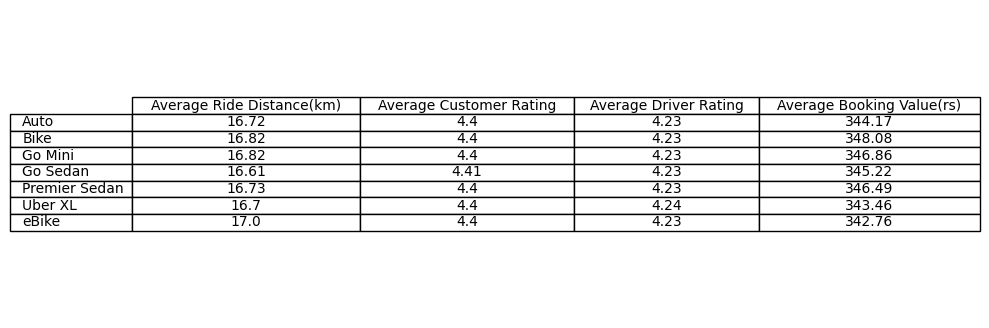

<Figure size 640x480 with 0 Axes>

In [45]:
vehicle_avg_table_rounded = vehicle_avg_table.round(2)
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=vehicle_avg_table_rounded.values,
                 colLabels=vehicle_avg_table_rounded.columns,
                 rowLabels=vehicle_avg_table_rounded.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(vehicle_avg_table_rounded.columns)+1)))
plt.show()
plt.savefig('visualization/vehicle_stats.png', bbox_inches='tight')

#fix ride distance

### Distribution of Cancellation Reasons
The below chart shows number of rides cancelled and reason for cancellation

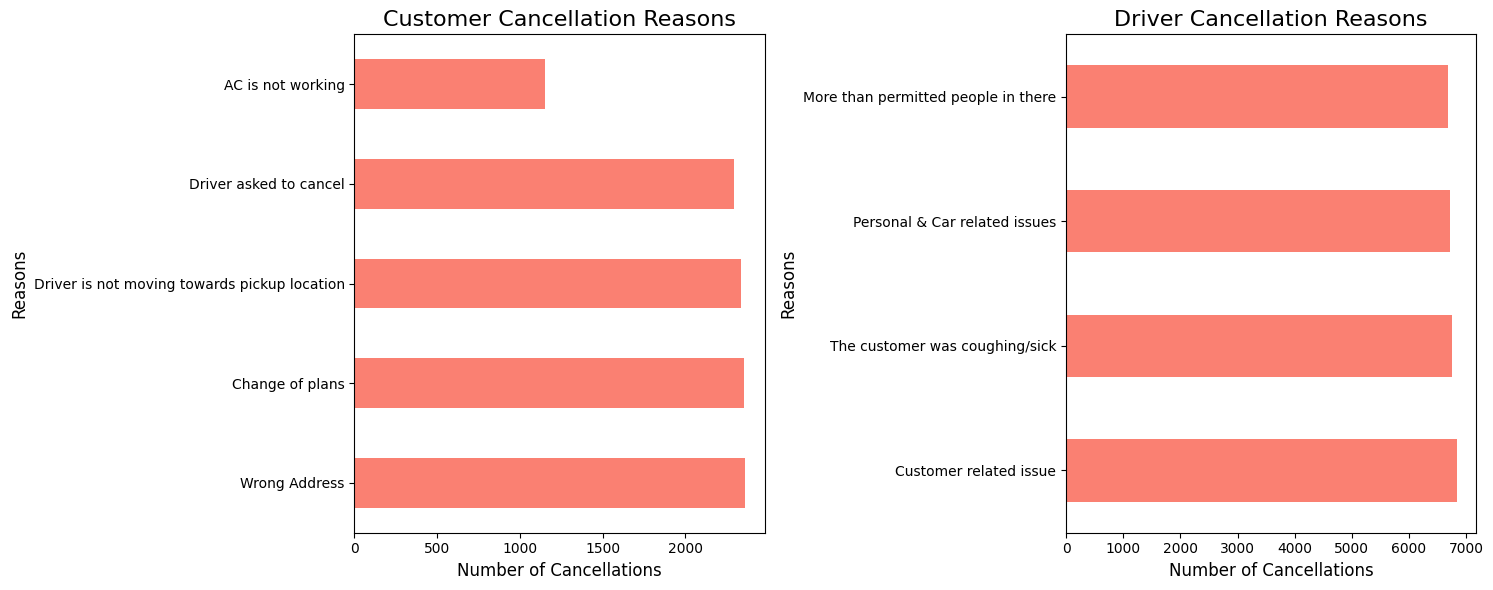

<Figure size 640x480 with 0 Axes>

In [46]:
customer_reasons = df1[df1['Cancelled Rides by Customer'] > 0]['Reason for cancelling by Customer'].value_counts()
driver_reasons = df1[df1['Cancelled Rides by Driver'] > 0]['Driver Cancellation Reason'].value_counts()

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
customer_reasons.plot(kind='barh', color='salmon')
plt.title('Customer Cancellation Reasons', fontsize=16)
plt.xlabel('Number of Cancellations', fontsize=12)
plt.ylabel('Reasons', fontsize=12)
plt.tight_layout()

plt.subplot(1,2,2)
driver_reasons.plot(kind='barh', color='salmon')
plt.title('Driver Cancellation Reasons', fontsize=16)
plt.xlabel("Number of Cancellations", fontsize=12)
plt.ylabel("Reasons", fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('visualization/Cancellation.png')

### Total Number of Rides by Booking Status
The below graph shows status of all rides on the dataset

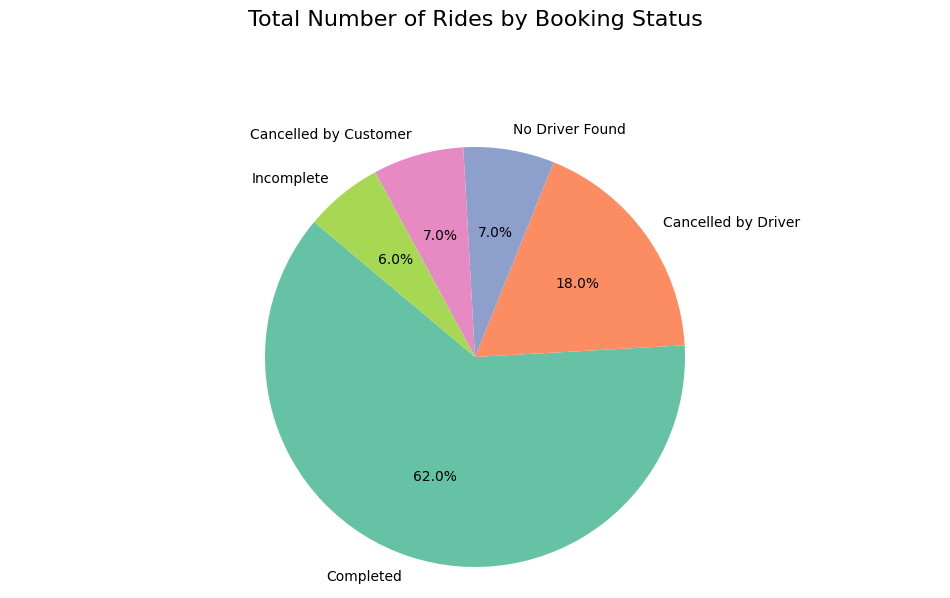

<Figure size 640x480 with 0 Axes>

In [62]:
ride_status_count = df1['Booking Status'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(ride_status_count, labels=ride_status_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Total Number of Rides by Booking Status", fontsize=16, y=1.2)
plt.axis('equal')
plt.show()
plt.savefig('visualization/Booking_status.png')